# KNN based classifier (Q2)

Importing required libraries, pandas to read csv file, numpy for ndarray and mean_squared_error, r2_score, to analyze performance of the model.

In [72]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score


# Data pre-processing:

Reading csv files with pandas library

In [73]:
ds2=pd.read_csv('./Datasets/q2/test.csv',header=None)
ds3=pd.read_csv('./Datasets/q2/train.csv',header=None)
ds3 = ds3.sample(frac=1).reset_index(drop=True)
ds3

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,e,x,f,w,f,n,f,w,b,p,...,s,w,w,p,w,t,p,w,s,g
1,e,x,f,n,t,n,f,c,b,n,...,s,p,g,p,w,o,p,n,y,d
2,p,f,f,y,f,f,f,c,b,p,...,k,b,n,p,w,o,l,h,v,g
3,p,f,y,n,f,s,f,c,n,b,...,k,p,w,p,w,o,e,w,v,p
4,p,x,y,e,f,y,f,c,n,b,...,s,p,w,p,w,o,e,w,v,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4491,p,x,s,w,t,f,f,c,b,p,...,f,w,w,p,w,o,p,h,s,g
4492,e,f,f,g,t,n,f,c,b,p,...,s,g,w,p,w,o,p,k,y,d
4493,p,f,s,e,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,d
4494,p,x,f,g,f,f,f,c,b,p,...,k,p,n,p,w,o,l,h,v,g


Removing column which have missing values in it

In [74]:
train_data_df=ds3.iloc[0:,1:]
train_data_df.drop(train_data_df.iloc[:,10:11],inplace=True,axis=1)

# One Hot Encoding

One Hot Encoding refers to splitting the column which contains numerical categorical data to many columns depending on the number of categories present in that column. Each column contains “0” or “1” corresponding to which column it has been placed.

In [75]:
train_label_df=ds3.iloc[0:,0]
 
ds2.drop(ds2.iloc[:,10:11],inplace=True,axis=1)
#pd.get_dummies(train_data_df,)

attri=[['s','k','f','x','c','b'],['f','g','y','s'],['n','b','c','g','r','p','u','e','w','y'],['f','t'],['a','l','c','y','f','m','n','p','s'],['n','f','d','a'],['c','w','d'],['n','b'],['k','n','b','h','g','r','o','p','u','e','w','y'],['t','e'],['s','k','y','f'],['f','y','k','s'],['y','w','e','p','o','g','c','b','n'],['y','w','e','p','o','g','c','b','n'],['u','p'],['n','o','w','y'],['t','o','n'],['l','f','e','c','n','p','s','z'],['y','w','u','o','r','h','b','n','k'],['y','v','s','n','c','a'],['g','l','m','p','u','w','d']]

train_data = pd.DataFrame(columns=None)
test=pd.DataFrame(columns=None)

get_dummies:
Pandas str.get_dummies() is used to separate each string in the caller series at the passed separator. A data frame is returned with all the possible values after splitting every string. If the text value in original data frame at same index contains the string (Column name/ Splited values) then the value at that position is 1 otherwise, 0.

Encoding of train_data

In [76]:
sum=0
for i in range(0,21):

    sum+=len(attri[i])
    dummies=pd.get_dummies(train_data_df.iloc[:,i])
    dummies = dummies.T.reindex(attri[i]).T.fillna(0)
    train_data=pd.concat([train_data, dummies], axis=1)
train_data

,s,k,f,x,c,b,f,g,y,s,...,n,c,a,g,l,m,p,u,w,d
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4491,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4492,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4493,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4494,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


Encoding of Test data:

In [77]:
for i in range(0,21):
    sum+=len(attri[i])
    dummies=pd.get_dummies(ds2.iloc[:,i])
    dummies = dummies.T.reindex(attri[i]).T.fillna(0)
    test=pd.concat([test, dummies], axis=1)
test

,s,k,f,x,c,b,f,g,y,s,...,n,c,a,g,l,m,p,u,w,d
0,0,0,0,1,0,0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0.0,0.0,1.0,0.0,...,1,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0.0,0.0,0.0,1.0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0.0,0.0,0.0,1.0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,1,0,0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,1,0,0
996,0,0,1,0,0,0,1.0,0.0,0.0,0.0,...,0,0,1,1,0,0,0,0,0,0
997,0,0,0,1,0,0,1.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
998,0,0,1,0,0,0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1


Converting both Test DataFrame and Train DataFrame into numpy array.

In [78]:
test=pd.DataFrame(test).to_numpy()

train_data=pd.DataFrame(train_data).to_numpy()
train_label=pd.DataFrame(train_label_df).to_numpy()

#  Euclidean Distance

The distance between two points in one dimension is simply the absolute value of the difference between their coordinates. Mathematically, this is shown as |p1 - q1| where p1 is the first coordinate of the first point and q1 is the first coordinate of the second point.

# ${\sqrt{\sum_{i=0}^{N} ({x_i-y_i})^2 }}$


In [53]:
acc=[]
K=[]
for k in range(1,11):
    K.append(k)

for k in K:
    rslt=[]        

    for j in range(0,(ds2.shape[0])):

        list=[]
        rank = [0 for  i in range(0, 2)]

        for i in range(0,500):
            d=distance.euclidean(test[j], train_data[i][:])
            temp=[d,train_label[i]]
            list.append(temp)

        list.sort()

        for a in range(0,k):
            if(list[a][1]=='e'):
                rank[0]+=1
            else:
                rank[1]+=1

        if(rank[0]>rank[1]):
            maxpos='e'
        else:
            maxpos='p'

        rslt.append(maxpos)
    test_labels=[]
    with open("./Datasets/q2/test_labels.csv") as f:
      for line in f:
        test_labels.append(line.strip())
    #print(test_labels, predictions)
    print (accuracy_score(test_labels, rslt))
    acc.append(accuracy_score(test_labels, rslt))
    

1.0
0.993
0.993
0.99
0.99
0.987
0.99
0.99
0.993
0.991


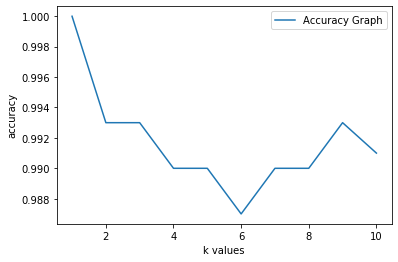

In [54]:
from matplotlib import pyplot as plt
plt.plot(K,acc,label='Accuracy Graph')
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.legend()

# Manhattan distance:

The distance between two points measured along axes at right angles. In a plane with p1 at (x1, y1) and p2 at (x2, y2), it is |x1 - x2| + |y1 - y2|.

In [55]:
acc=[]
K=[]
for k in range(1,11):
    K.append(k)

for k in K:
    rslt=[]        

    for j in range(0,(ds2.shape[0])):

        list=[]
        rank = [0 for  i in range(0, 2)]

        for i in range(0,500):
#             d=distance.euclidean(test[j], train_data[i][:])
            d= np.linalg.norm(test[j]-train_data[i][:])
            temp=[d,train_label[i]]
            list.append(temp)

        list.sort()

        for a in range(0,k):
            if(list[a][1]=='e'):
                rank[0]+=1
            else:
                rank[1]+=1

        if(rank[0]>rank[1]):
            maxpos='e'
        else:
            maxpos='p'

        rslt.append(maxpos)
    test_labels=[]
    with open("./Datasets/q2/test_labels.csv") as f:
      for line in f:
        test_labels.append(line.strip())
    #print(test_labels, predictions)
    print (accuracy_score(test_labels, rslt))
    acc.append(accuracy_score(test_labels, rslt))
    

1.0
0.993
0.993
0.99
0.99
0.987
0.99
0.99
0.993
0.991


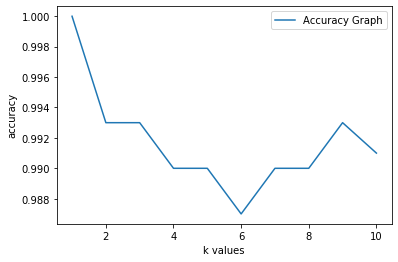

In [57]:
from matplotlib import pyplot as plt
plt.plot(K,acc,label='Accuracy Graph')
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.legend()

# Performance

In [79]:
rslt=[]        
k=3

for j in range(0,(ds2.shape[0])):

    list=[]
    rank = [0 for  i in range(0, 2)]

    for i in range(0,train_data.shape[0]):
        d=distance.euclidean(test[j], train_data[i][:])
        temp=[d,train_label[i]]
        list.append(temp)

    list.sort()

    for a in range(0,k):
        if(list[a][1]=='e'):
            rank[0]+=1
        else:
            rank[1]+=1

    if(rank[0]>rank[1]):
        maxpos='e'
    else:
        maxpos='p'

    rslt.append(maxpos)
    
test_labels=[]

with open("./Datasets/q2/test_labels.csv") as f:
  for line in f:
    test_labels.append(line.strip())
#print(test_labels, predictions)
print (accuracy_score(test_labels, rslt))


1.0


Plotting the graph.

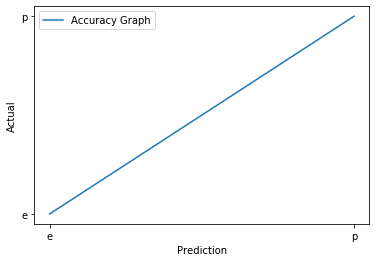

In [70]:
from matplotlib import pyplot as plt
plt.plot(rslt,test_labels,label='Accuracy Graph')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.legend()

# Performance

Confusion matrix:
A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. It allows the visualization of the performance of an algorithm.
It allows easy identification of confusion between classes e.g. one class is commonly mislabeled as the other. Most performance measures are computed from the confusion matrix.

In [81]:
cm = confusion_matrix(test_labels, rslt)
print(cm)

[[505   0]
 [  0 495]]


F1 score:
F1 score combines precision and recall relative to a specific positive class -The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst at 0

In [82]:
print(f1_score(test_labels, rslt,average='micro'))

1.0
